# Preprocessing et Modelisation

# Analyse Exploratoire des Données


### Problème: Prédire si un individu est atteint de Cancer ou Non

### Mission : 
- Preprocessing
- Modélisation

### Meta données

**- Contexte**

Les maladies cardiovasculaires sont la première cause de décès dans le monde, faisant environ 17,9 millions de vies chaque année, ce qui représente 31 % de tous les décès dans le monde. Quatre décès sur 5 par MCV sont dus à des crises cardiaques et à des accidents vasculaires cérébraux, et un tiers de ces décès surviennent prématurément chez des personnes de moins de 70 ans. L'insuffisance cardiaque est un événement courant causé par les maladies cardiovasculaires et cet ensemble de données contient 11 caractéristiques qui peuvent être utilisées pour prédire une éventuelle maladie cardiaque.

Les personnes atteintes de maladies cardiovasculaires ou à haut risque cardiovasculaire (en raison de la présence d'un ou plusieurs facteurs de risque tels que l'hypertension, le diabète, l'hyperlipidémie ou une maladie déjà établie) ont besoin d'une détection et d'une gestion précoces dans lesquelles un modèle d'apprentissage automatique peut être d'une grande aide.


**- Informations sur les attributs**

AGE : âge du patient,

SEXE : sexe du patient [homme, femme]

TDT : type de douleur thoracique [AT : angine typique, AA : angine atypique, DNA : douleur non angineuse, ASY : asymptomatique]

PAR : pression artérielle au repos [mm Hg]

CHOLESTEROL : cholestérol sérique [mm/dl]

GAJ : glycémie Ã  jeun [1 : si glycémie Ã  jeun > 120 mg/dl, 0 : sinon]

ECG au repos : résultats de l'electrocardiogramme au repos [Normal : normal, ST : présentant une anomalie de l'onde ST-T , HVG : montrant une hypertrophie ventriculaire gauche probable]

FCMAX : fréquence cardiaque maximale atteinte

ANGINE : angine induite par l'exercice [Oui, Non]

DEPRESSION : Valeur numérique mesurée en dépression

PENTE: la pente du segment ST d'exercice de pointe [Ascendant, Plat, Descendant]

COEUR : maladie cardiaque[1 : Présence de la maladie, 0 : Absence de la maladie]

### Conclusion EDA


- ligne: 918, colonne: 12 (échantillon faible, **il faudra éviter certains algorithmes comme la random forest, les réseaux de neurones...) 

- Type de variable: 7 qualitatives **(y compris la cible : variable coeur)** , 5 quantitatives

    - Les variable **coeur** (la target) et **glycemie_a_jeune** semblent déjà encodées
    
- Les modalités vont de 2 (sexe, glycemie_a_jeun, angine, **coeur (la target)** à 222 (cholesterol)
    - Les variables qualitatives sont pour la plupart binaire
    
### La cible: coeur

- Binaire (0:abscence, 1:présence)
- plus de la moitié des individus sont malade (55%);
- Les différentes catégories semblent être équilibrées. **L'exactitude pourrait être une bonne métrique**

### Variables qualitatives

- La majorité des individus sont des hommes environ **80%** (Sexe);
- Le type de douleur dominant est celui de l'angine asymétrique soit 54%
- La glycémie à jeûne la plus fréquente est celle qui est **inférieur à 120 mg/ml**. elle represente 77% de l'effectif total,
- la plupart des individus ont un electrocardiogramme **normal** soit 60%,
- La majorité des individus n'ont pas d'angine (60%)
- La pente la plus repandue est **Plate**. elle fait 50%.

### Variables quantitatives

- **Age**
    - Nous somme en présence d'une population agée. Âge compris entre 50 et 65 ans
    - Le plus jeune à 28 ans tandis que le plus âgé à 77 ans
    - L'âge moyen est de 54 ans
    - L'écart entre la moyenne d'âge et l'âge de la plupart des individus est faible (écart-type);
    - La distribution semble être normale (moyenne=medianne), 50% des individus ont une moyenne d'âge de 54 ans
- **Frequence cardiaque Maximale** [https://sante.lefigaro.fr/mieux-etre/sports-activites-physiques/frequence-cardiaque/quest-ce-que-frequence-cardiaque]
    - Le rythme cardiaque le plus bas est de 60 battements/minute et le plus élevé est 202 battements/minutes;
    - la majorité des personnes ont un rythme cardiaque de 137 battements/minutes;
    - La distribution semble être normale (moyenne=medianne), 50% des individus ont une fréquence cardiaque de 137 battements/minutes

- **pression arterielle repos**
    - La pression arterielle au repos le plus bas est de 0 unité de mesure et le plus élevé est 200 unité de mesure;
    - la majorité des personnes ont une pression arterielle au repos de 132,39;
    - La distribution semble être normale (moyenne=medianne), 50% des individus ont une fréquence cardiaque d'environ 132,39 battements/minutes
    
**- La dépression et le cholesterol ne sont pas normalement distribués**
    
    - Dépression
        - Distribution étalée à gauche, 50% des individus ont une dépression inférieur à 0.9 (Moyenne > mediane)
        - 
    - Cholesterol
        - Distribution étalée à droite, 50% des individus ont une taux de cholesterol supérieur à 199 (Moyenne < mediane)

**Il faudra confirmer/infirmer ces hypothèse de normalité avec des test de normalité (Jarque bera/shapiro wilk)**

**NB: Les variables normalement distribuées peuvent avoir un impacte significatif sur la présence de maladie ou non** 

### Analyse bivariée

#### Coeur (Target) / variable qualitative

- Les personnes âgées présentent une maladie cardiaque. Ils ont 55 et +
- y'a plus de malade homme que de femme. toutefois, N'oublions pas que la population est dominée par les hommes
- Les personnes avec une angine asymétrique sont beaucoup plus malade
- La plupart des personnes malades ont une glycémie à jeune supérieur à 120 mg
- Les personnes malades présentent une anomalie d'onde ST plus élevée que les personnes non malades
- La majorité des personnes malades ont une angine;
- Les malades présentent une pente plate

**NB: Pour être plus rigoureux il faut tester ces hypothèses avec un test de khi2** 

#### Coeur (Target) / Variable quantitative

- il semble avoir un lien entre l'âge et le fait qu'une personne soit malade puis entre la fréquence cardiaque et la présence de maladie
- la plupart des autres variables semblent de pas influencer le fait qu'une personne soit malade ou pas.

**La question est de savoir si une combinaison de plusieurs variables peuvent influencer le fait qu'une personne soit malade ou pas**

**NB: Pour être plus rigoureux il faut tester ces hypothèses avec une analyse de la variance**

### Variable quantitative/quantitative

- Pas de relation positive entre les variables quantitatives
- forte correlation négative entre les

**NB: En analysant les relations Variable quantitative/quantitative en fonction de la présence ou non de la maladie (pairplot avec paramètre hue), On constate que les variables quantitatves ne permettent pas clairemenr de distinguer la présence de maladie ou non**

**- Il existe non seulement des valeurs abérrantes qu'il faudra traiter lors du Preprocessing et de plus il faut penser à normaliser les variables qui semblent ne pas être sur la même échelle.**

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from prettytable import PrettyTable

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score

warnings.filterwarnings('ignore')

In [2]:
DF = pd.read_excel('heart.xlsx')

In [3]:
df = DF.copy()

In [4]:
df.rename(columns={'TDT':'type_douleur_thoracique',
                   'PAR': 'pression_arterielle_repos',
                   'GAJ':'glycemie_a_jeun',
                   'ECG':'electrocardiogramme_repos',
                  'FCMAX':'frequence_cardiaque_max',
                  'CŒUR':'coeur'}, inplace=True)

In [5]:
col = []
for i in range(0, len(df.columns)):
    col.append(df.columns[i].lower())

In [6]:
df.columns = col

In [7]:
df.head()

,age,sexe,type_douleur_thoracique,pression_arterielle_repos,cholesterol,glycemie_a_jeun,electrocardiogramme_repos,frequence_cardiaque_max,angine,depression,pente,coeur
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


In [8]:
df.columns = df.columns.str.strip()

In [9]:
df.columns

Index(['age', 'sexe', 'type_douleur_thoracique', 'pression_arterielle_repos',
       'cholesterol', 'glycemie_a_jeun', 'electrocardiogramme_repos',
       'frequence_cardiaque_max', 'angine', 'depression', 'pente', 'coeur'],
      dtype='object')

###  Train et Test set

In [10]:
trainset, testset = train_test_split(df, train_size=0.7, random_state=0)

In [11]:
trainset.shape

(642, 12)

In [12]:
testset.shape

(276, 12)

In [13]:
X_train, y_train = trainset.drop('coeur', axis=1), trainset['coeur']

In [14]:
X_test, y_test = testset.drop('coeur', axis=1), testset['coeur']

## Première approche:

- Encodage

In [21]:
df.isna().sum()

age                          0
sexe                         0
type_douleur_thoracique      0
pression_arterielle_repos    0
cholesterol                  0
glycemie_a_jeun              0
electrocardiogramme_repos    0
frequence_cardiaque_max      0
angine                       0
depression                   0
pente                        0
coeur                        0
dtype: int64

In [24]:
X_train.shape

(642, 11)

In [25]:
y_train.shape

(642,)

In [31]:
X_test.shape

(276, 11)

In [32]:
y_test.shape

(276,)

In [27]:
y_train.unique()

array([1, 0], dtype=int64)

In [34]:
X_train = pd.get_dummies(X_train)

In [35]:
X_train.values

array([[ 32., 118., 529., ...,   0.,   0.,   1.],
       [ 36., 112., 340., ...,   0.,   0.,   1.],
       [ 51.,  95.,   0., ...,   0.,   0.,   1.],
       ...,
       [ 57., 128., 303., ...,   1.,   0.,   0.],
       [ 64., 134., 273., ...,   0.,   1.,   0.],
       [ 47., 108., 243., ...,   1.,   0.,   0.]])

#### Modelling

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [38]:
svm = SVC(random_state=0)

In [39]:
svm.fit(X_train, y_train)

SVC(random_state=0)

In [41]:
svm.score(X_train, y_train)

0.7180685358255452

In [43]:
X_test = pd.get_dummies(X_test)

In [45]:
y_pred = svm.predict(X_test)

In [46]:
svm.score(X_test, y_test)

0.7137681159420289

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.71      0.67       113
           1       0.78      0.72      0.75       163

    accuracy                           0.71       276
   macro avg       0.71      0.71      0.71       276
weighted avg       0.72      0.71      0.72       276



- Le taux de prédiction correcte est de 71% (exactitude)
- On peut voir que la proportion de prediction positive est de 78%

###  Deuxième approche

- Encodage
- Normalisation

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
Stand = StandardScaler()

In [38]:
col_quant = [col for col in X_train.select_dtypes(exclude=object) if X_train[col].nunique() >=10]
col_quant

['age',
 'pression_arterielle_repos',
 'cholesterol',
 'frequence_cardiaque_max',
 'depression']

In [44]:
X_train[col_quant] = Stand.fit_transform(X_train[col_quant])

In [76]:
X_test[col_quant] = Stand.transform(X_test[col_quant])

In [55]:
X_train.select_dtypes(exclude=object).columns

Index(['age', 'pression_arterielle_repos', 'cholesterol', 'glycemie_a_jeun',
       'frequence_cardiaque_max', 'depression'],
      dtype='object')

In [58]:
x_train = pd.concat([X_train[col_quant], X_train[[col for col in X_train if X_train[col].nunique() <= 10]]], axis=1)

In [60]:
X_train = pd.get_dummies(x_train)

In [81]:
x_test = pd.concat([X_test[col_quant], X_test[[col for col in X_test if X_test[col].nunique() <= 10]]], axis=1)

In [83]:
X_test = pd.get_dummies(x_test)

#### Modélisation

In [44]:
svm = SVC(random_state=0)

In [66]:
svm.fit(X_train, y_train)

SVC(random_state=0)

In [67]:
svm.score(X_train, y_train)

0.9143302180685359

In [84]:
y_pred = svm.predict(X_test)

In [85]:
svm.score(X_test, y_test)

0.8695652173913043

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.83       113
           1       0.87      0.91      0.89       163

    accuracy                           0.87       276
   macro avg       0.87      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276



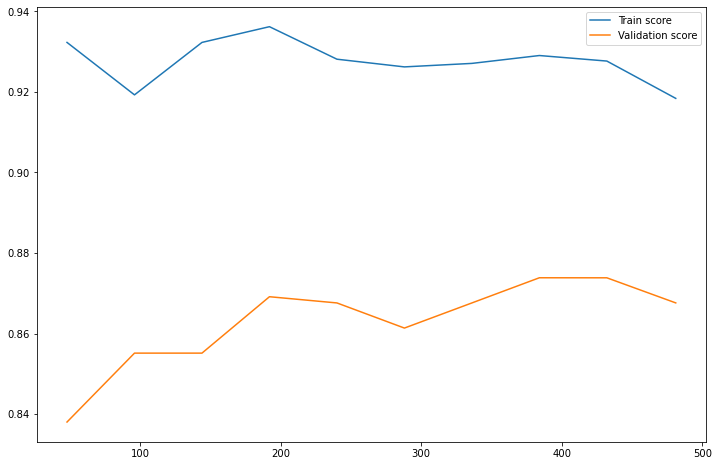

In [92]:
N, train_score, val_score = learning_curve(svm, X_train, y_train,cv=4, scoring='accuracy', train_sizes=np.linspace(0.1, 1., 10))

plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label = 'Train score')
plt.plot(N, val_score.mean(axis=1), label = 'Validation score')
plt.legend();

- Rien qu'en normalisant, on peut constater que le modèle a augmenté en performance rien
    - Le taux de prédiction correct est passé de 71% (1er approche) à 87 % (2e approche);
    - Il y a non seulement surapprentissage et la quantité de donnée parait insuffisante

### Troisième approche

- Encodage;
- Normalisation: Robust Scaler (Moins sensible aux valeurs abérrantes)
- Traitement des valeurs abérrantes

In [87]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [33]:
Robust = RobustScaler()

In [35]:
X_train[[col for col in X_train.select_dtypes(exclude=object) if col not in 'glycemie_a_jeun']] = Robust.fit_transform(X_train[[col for col in X_train.select_dtypes(exclude=object) if col not in 'glycemie_a_jeun']])
X_train

,age,sexe,type_douleur_thoracique,pression_arterielle_repos,cholesterol,glycemie_a_jeun,electrocardiogramme_repos,frequence_cardiaque_max,angine,depression,pente
76,-1.692308,homme,ASY,-0.60,3.438202,0,Normal,-0.211921,Non,-0.400000,Plat
48,-1.384615,homme,DNA,-0.90,1.314607,0,Normal,1.218543,Non,0.266667,Plat
304,-0.230769,homme,ASY,-1.75,-2.505618,1,Normal,-0.317881,Non,1.066667,Plat
263,0.384615,homme,ASY,0.00,-1.089888,0,Normal,-0.344371,Non,-0.400000,Plat
744,0.461538,homme,ASY,-0.65,0.078652,1,Normal,0.582781,Oui,0.533333,Ascendant
...,...,...,...,...,...,...,...,...,...,...,...
835,0.000000,homme,ASY,-1.00,0.179775,0,Normal,-0.317881,Oui,1.466667,Plat
192,-0.461538,homme,AA,0.00,0.247191,0,Normal,0.582781,Non,-0.400000,Ascendant
629,0.230769,femme,ASY,-0.10,0.898876,0,LVH,0.556291,Non,-0.400000,Ascendant
559,0.769231,homme,ASY,0.20,0.561798,0,Normal,-0.953642,Oui,2.266667,Descendant


In [37]:
X_train_robust = pd.get_dummies(X_train)

In [88]:
X_train_robust

,age,pression_arterielle_repos,cholesterol,glycemie_a_jeun,frequence_cardiaque_max,depression,sexe_femme,sexe_homme,type_douleur_thoracique_AA,type_douleur_thoracique_ASY,type_douleur_thoracique_AT,type_douleur_thoracique_DNA,electrocardiogramme_repos_LVH,electrocardiogramme_repos_Normal,electrocardiogramme_repos_ST,angine_Non,angine_Oui,pente_Ascendant,pente_Descendant,pente_Plat
76,-1.692308,-0.60,3.438202,0,-0.211921,-0.400000,0,1,0,1,0,0,0,1,0,1,0,0,0,1
48,-1.384615,-0.90,1.314607,0,1.218543,0.266667,0,1,0,0,0,1,0,1,0,1,0,0,0,1
304,-0.230769,-1.75,-2.505618,1,-0.317881,1.066667,0,1,0,1,0,0,0,1,0,1,0,0,0,1
263,0.384615,0.00,-1.089888,0,-0.344371,-0.400000,0,1,0,1,0,0,0,1,0,1,0,0,0,1
744,0.461538,-0.65,0.078652,1,0.582781,0.533333,0,1,0,1,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.000000,-1.00,0.179775,0,-0.317881,1.466667,0,1,0,1,0,0,0,1,0,0,1,0,0,1
192,-0.461538,0.00,0.247191,0,0.582781,-0.400000,0,1,1,0,0,0,0,1,0,1,0,1,0,0
629,0.230769,-0.10,0.898876,0,0.556291,-0.400000,1,0,0,1,0,0,1,0,0,1,0,1,0,0
559,0.769231,0.20,0.561798,0,-0.953642,2.266667,0,1,0,1,0,0,0,1,0,0,1,0,1,0


In [39]:
X_test[[col for col in X_train.select_dtypes(exclude=object) if col not in 'glycemie_a_jeun']] = Robust.transform(X_test[[col for col in X_train.select_dtypes(exclude=object) if col not in 'glycemie_a_jeun']])

In [42]:
X_test_robust = pd.get_dummies(X_test)

#### Modelisation

In [45]:
svm.fit(X_train_robust, y_train)

SVC(random_state=0)

In [46]:
svm.score(X_train_robust, y_train)

0.9174454828660437

In [48]:
svm.score(X_test_robust, y_test)

0.8623188405797102

In [47]:
y_pred = svm.predict(X_test_robust)

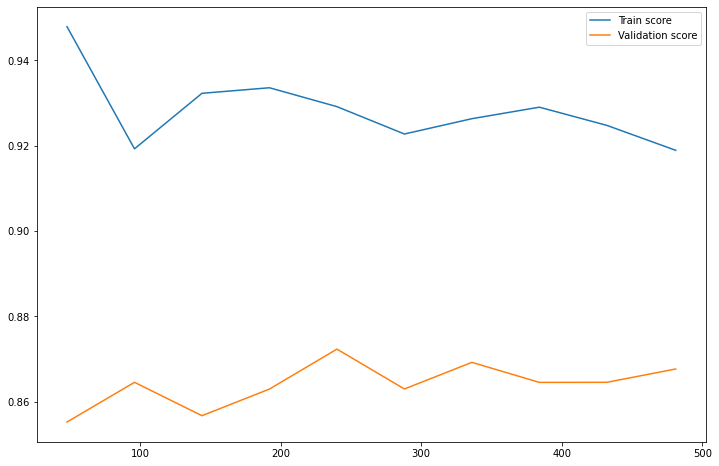

In [49]:
N, train_score, val_score = learning_curve(svm, X_train_robust, y_train,cv=4, scoring='accuracy', train_sizes=np.linspace(0.1, 1., 10))

plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label = 'Train score')
plt.plot(N, val_score.mean(axis=1), label = 'Validation score')
plt.legend();

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       113
           1       0.86      0.91      0.89       163

    accuracy                           0.86       276
   macro avg       0.86      0.85      0.86       276
weighted avg       0.86      0.86      0.86       276



- Y'a pas de différence entre les performances par l'approche 2 et celle de l'approche 3 (exactitude = 86%)

In [62]:
sgd = SGDClassifier(random_state=0)
Log = LogisticRegression(random_state=0)

In [63]:
models = {"sgd":sgd, "svm":svm, "Logistic":Log}

In [67]:
def evaluation(model):
    model.fit(X_train_robust, y_train)
    y_pred = model.predict(X_test_robust)
    
    print(confusion_matrix(y_test, y_pred))
    N, train_score, val_score = learning_curve(model, X_train_robust, y_train,cv=4, scoring='accuracy', train_sizes=np.linspace(0.1, 1., 10))

    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label = 'Train score')
    plt.plot(N, val_score.mean(axis=1), label = 'Validation score')
    plt.legend();

In [69]:
X_train_robust

,age,pression_arterielle_repos,cholesterol,glycemie_a_jeun,frequence_cardiaque_max,depression,sexe_femme,sexe_homme,type_douleur_thoracique_AA,type_douleur_thoracique_ASY,type_douleur_thoracique_AT,type_douleur_thoracique_DNA,electrocardiogramme_repos_LVH,electrocardiogramme_repos_Normal,electrocardiogramme_repos_ST,angine_Non,angine_Oui,pente_Ascendant,pente_Descendant,pente_Plat
76,-1.692308,-0.60,3.438202,0,-0.211921,-0.400000,0,1,0,1,0,0,0,1,0,1,0,0,0,1
48,-1.384615,-0.90,1.314607,0,1.218543,0.266667,0,1,0,0,0,1,0,1,0,1,0,0,0,1
304,-0.230769,-1.75,-2.505618,1,-0.317881,1.066667,0,1,0,1,0,0,0,1,0,1,0,0,0,1
263,0.384615,0.00,-1.089888,0,-0.344371,-0.400000,0,1,0,1,0,0,0,1,0,1,0,0,0,1
744,0.461538,-0.65,0.078652,1,0.582781,0.533333,0,1,0,1,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.000000,-1.00,0.179775,0,-0.317881,1.466667,0,1,0,1,0,0,0,1,0,0,1,0,0,1
192,-0.461538,0.00,0.247191,0,0.582781,-0.400000,0,1,1,0,0,0,0,1,0,1,0,1,0,0
629,0.230769,-0.10,0.898876,0,0.556291,-0.400000,1,0,0,1,0,0,1,0,0,1,0,1,0,0
559,0.769231,0.20,0.561798,0,-0.953642,2.266667,0,1,0,1,0,0,0,1,0,0,1,0,1,0


In [84]:
y_test.value_counts()

1    163
0    113
Name: coeur, dtype: int64

[[ 89  24]
 [ 14 149]]


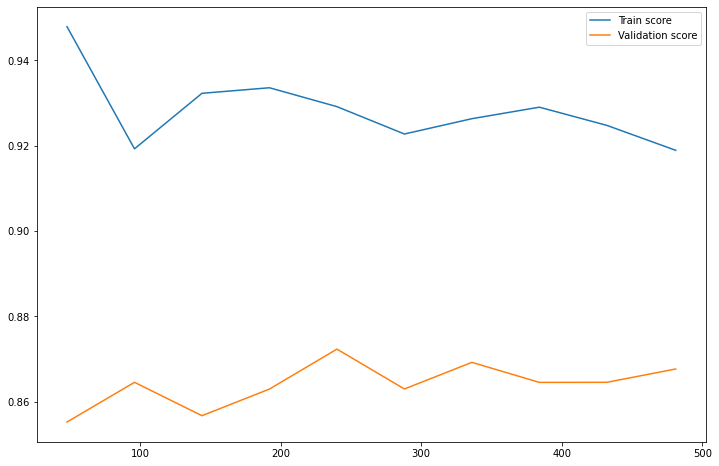

In [72]:
evaluation(svm)

[[ 77  36]
 [  9 154]]


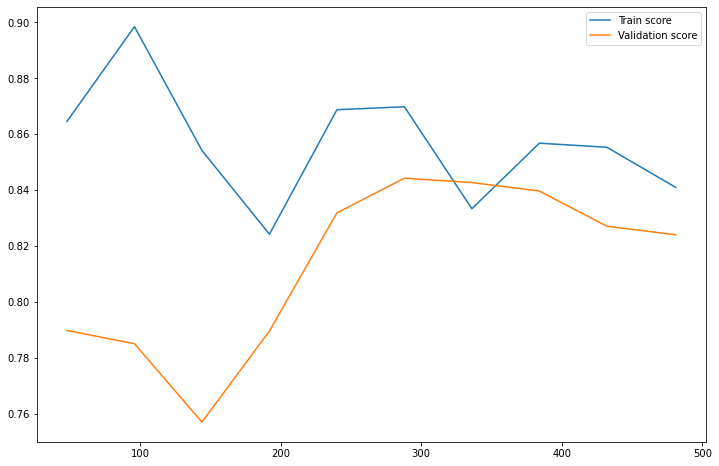

In [73]:
evaluation(sgd)

[[ 86  27]
 [ 19 144]]


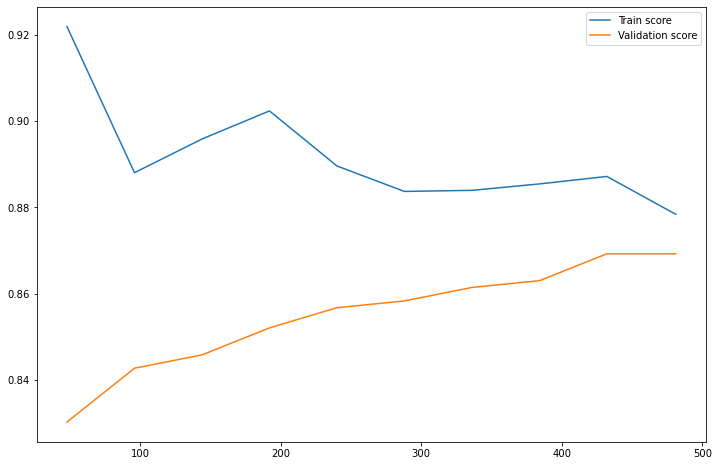

In [74]:
evaluation(Log)

- Il faut beaucoup plus de données pour avoir un bon modèle au niveau du svm.
- Le modèle retenu est celui de la regression logistique

## Optimisation

In [89]:
parameters = {'C': [1, 2, 10],
              'class_weight': [[0.5, 0.5], [0.25, 0.75], [0.40, 0.60], [0.60, 0.40]]
             }

grid_search = GridSearchCV(estimator=Log, param_grid=parameters, cv=5)
grid_search.fit(X_train_robust, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1, 2, 10],
                         'class_weight': [[0.5, 0.5], [0.25, 0.75], [0.4, 0.6],
                                          [0.6, 0.4]]})

In [90]:
print("Le meilleur score est: ", grid_search.best_score_)
print("La combinaison de paramètres ayant conduit à ce score est: ", grid_search.best_params_)

Le meilleur score est:  0.8707364341085271
La combinaison de paramètres ayant conduit à ce score est:  {'C': 10, 'class_weight': [0.5, 0.5]}


In [99]:
best_clf = grid_search.best_estimator_

y_pred = best_clf.predict(X_test_robust)

In [101]:
metric_table = PrettyTable()
metric_table.field_names = ["Métriques", "Valeurs"]
metric_table.add_row(["Recall", round(recall_score(y_test, y_pred) * 100, 2)])
metric_table.add_row(["Precision", round(precision_score(y_test, y_pred) * 100, 2)])
metric_table.add_row(["Accuracy", round(accuracy_score(y_test, y_pred) * 100, 2)])
metric_table.add_row(["f1", round(f1_score(y_test, y_pred) * 100, 2)])
print(metric_table)

+-----------+---------+
| Métriques | Valeurs |
+-----------+---------+
|   Recall  |  88.34  |
| Precision |  84.21  |
|  Accuracy |  83.33  |
|     f1    |  86.23  |
+-----------+---------+


#### Quatrième approche

- Encodage
- Normalisation
- Traitement de données abérrantes

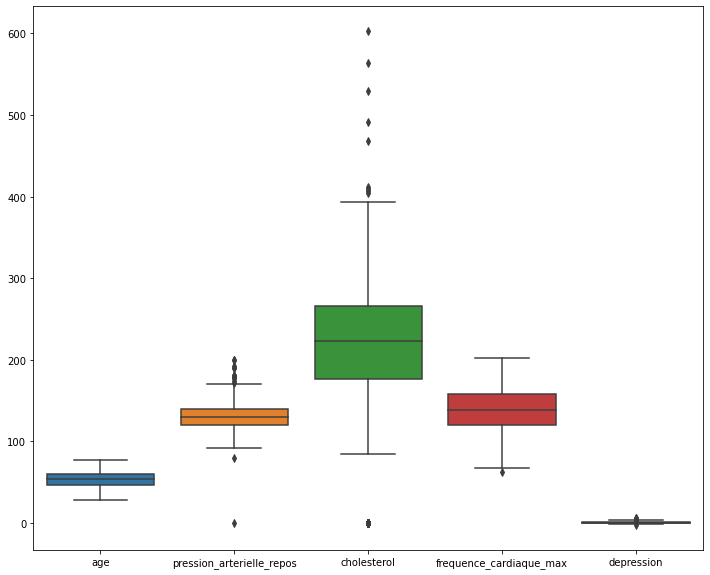

In [86]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=trainset[[col for col in X_train.select_dtypes(exclude=object) if col not in 'glycemie_a_jeun']]);

In [57]:
df1 = df.copy()

In [59]:
inqt = 1.5 * (np.percentile(df1["cholesterol"],75) - np.percentile(df1["cholesterol"],75))
m_sup = inqt + np.percentile(df1["cholesterol"],75)
m_inf = np.percentile(df1["cholesterol"],25) - inqt
df_trans = df1.drop(df1[df1["cholesterol"]<m_inf].index)
dfx_trans = df_trans.drop(df1[df1["cholesterol"]>m_sup].index)

In [60]:
dfx_trans

,age,sexe,type_douleur_thoracique,pression_arterielle_repos,cholesterol,glycemie_a_jeun,electrocardiogramme_repos,frequence_cardiaque_max,angine,depression,pente,coeur
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0
6,45,femme,AA,130,237,0,Normal,170,Non,0.0,Ascendant,0
7,54,homme,AA,110,208,0,Normal,142,Non,0.0,Ascendant,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,femme,ASY,140,241,0,Normal,123,Oui,0.2,Plat,1
913,45,homme,AT,110,264,0,Normal,132,Non,1.2,Plat,1
914,68,homme,ASY,144,193,1,Normal,141,Non,3.4,Plat,1
916,57,femme,AA,130,236,0,LVH,174,Non,0.0,Plat,1


In [ ]:
X_train, y_train, X_test, y_test = 